In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [ ]:
df = pd.read_excel('Features_All.xlsx')
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,Class
0,9.35953,0.877714,1.445001e+06,1.433515,1.20226,0.886169,7.784947,10.56179,0.373203,2.905362,3.941686,0.448686,0.330720,0
1,10.56179,0.990459,1.630615e+06,1.617654,0.82276,1.084481,12.837024,9.73903,0.329395,4.228451,3.207987,0.271013,0.357222,0
2,9.73903,0.913303,1.503591e+06,1.491640,0.20804,1.021828,46.813257,9.53099,0.355785,16.655451,3.390983,0.074017,0.363551,0
3,9.53099,0.893793,1.471472e+06,1.459776,0.04360,0.995446,218.600688,9.57459,0.362082,79.151376,3.466787,0.015787,0.360433,0
4,9.57459,0.897882,1.478203e+06,1.466454,0.39950,1.043542,23.966433,9.17509,0.358971,8.603254,3.293591,0.143409,0.374601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,7.61395,0.711285,1.209523e+06,1.161621,0.80467,0.904418,9.462202,8.41862,0.451408,4.271316,3.800235,0.363235,0.408262,7
3996,8.41862,0.786456,1.337350e+06,1.284385,0.55533,0.938118,15.159671,8.97395,0.409925,6.214323,3.678643,0.227643,0.384558,7
3997,8.97395,0.838334,1.425568e+06,1.369109,0.22230,0.975827,40.368646,9.19625,0.386118,15.587045,3.550834,0.085834,0.376784,7
3998,9.19625,0.859101,1.460882e+06,1.403024,0.02224,0.997587,413.500450,9.21849,0.378306,156.429856,3.487414,0.008414,0.377394,7


In [ ]:
df2 = df.sample(frac=1).reset_index(drop=True)
df2

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,Class
0,8.13313,0.759786,1.291998e+06,1.240830,0.04799,0.994134,169.475516,8.18112,0.352017,59.658262,2.879893,0.016893,0.349952,7
1,5.87494,0.549937,9.040817e+05,0.896600,0.00380,1.000647,1546.036842,5.87114,0.134640,208.157895,0.790488,0.000512,0.134727,1
2,5.64152,0.528087,8.681612e+05,0.860977,0.08003,0.986013,70.492565,5.72155,0.219622,15.481694,1.256576,0.017576,0.216550,1
3,7.96917,0.764884,1.277070e+06,1.215200,0.00967,0.998788,824.112720,7.97884,0.106285,87.590486,0.848028,0.001028,0.106156,6
4,9.08118,0.850064,1.397483e+06,1.385918,0.07698,0.991594,117.968044,9.15816,0.290601,34.281632,2.661370,0.022370,0.288158,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,6.40411,0.610615,9.530862e+05,0.977863,0.13712,1.021880,46.704419,6.26699,0.053559,2.501459,0.335656,0.007344,0.054731,3
3996,7.50325,0.720165,1.202405e+06,1.144153,0.14860,0.980580,50.492934,7.65185,0.040116,2.025572,0.306961,0.005961,0.039337,6
3997,7.21851,0.676934,1.114453e+06,1.105594,0.57672,1.086832,12.516490,6.64179,0.408256,5.109932,2.711551,0.235449,0.443706,0
3998,8.24062,0.749959,1.473644e+06,1.245808,0.12797,0.984708,64.394936,8.36859,0.389898,25.107447,3.262895,0.049895,0.383936,5


In [ ]:
x=df2.iloc[ : , 0:13]
x

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,8.13313,0.759786,1.291998e+06,1.240830,0.04799,0.994134,169.475516,8.18112,0.352017,59.658262,2.879893,0.016893,0.349952
1,5.87494,0.549937,9.040817e+05,0.896600,0.00380,1.000647,1546.036842,5.87114,0.134640,208.157895,0.790488,0.000512,0.134727
2,5.64152,0.528087,8.681612e+05,0.860977,0.08003,0.986013,70.492565,5.72155,0.219622,15.481694,1.256576,0.017576,0.216550
3,7.96917,0.764884,1.277070e+06,1.215200,0.00967,0.998788,824.112720,7.97884,0.106285,87.590486,0.848028,0.001028,0.106156
4,9.08118,0.850064,1.397483e+06,1.385918,0.07698,0.991594,117.968044,9.15816,0.290601,34.281632,2.661370,0.022370,0.288158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,6.40411,0.610615,9.530862e+05,0.977863,0.13712,1.021880,46.704419,6.26699,0.053559,2.501459,0.335656,0.007344,0.054731
3996,7.50325,0.720165,1.202405e+06,1.144153,0.14860,0.980580,50.492934,7.65185,0.040116,2.025572,0.306961,0.005961,0.039337
3997,7.21851,0.676934,1.114453e+06,1.105594,0.57672,1.086832,12.516490,6.64179,0.408256,5.109932,2.711551,0.235449,0.443706
3998,8.24062,0.749959,1.473644e+06,1.245808,0.12797,0.984708,64.394936,8.36859,0.389898,25.107447,3.262895,0.049895,0.383936


In [ ]:
y=df2['Class']
y

0       7
1       1
2       1
3       6
4       1
       ..
3995    3
3996    6
3997    0
3998    5
3999    1
Name: Class, Length: 4000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.to_excel('X_train_clf.xlsx')
y_train.to_excel('y_train_clf.xlsx')
x_test.to_excel('x_test_clf.xlsx')
y_test.to_excel('y_test_clf.xlsx')

In [ ]:
x_train = pd.read_excel('X_train_clf.xlsx')
x_test = pd.read_excel('x_test_clf.xlsx')
y_train = pd.read_excel('y_train_clf.xlsx')
y_test = pd.read_excel('y_test_clf.xlsx')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators= 100, random_state=65, min_samples_split= 2, min_samples_leaf= 1, max_features= None, max_depth= 32, criterion='entropy')
RFC.fit(x_train, y_train)
RFC_pred = RFC.predict(x_test)
RFC_acc= accuracy_score(y_test, RFC_pred)
RFC_acc

<ipython-input-3-853e9362e6e5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(x_train, y_train)


0.77375

In [ ]:
max_accuracy = 0
best_random_state = 0

# Iterate through random states from 0 to 500
for random_state in range(501):
    # Create a Random Forest Classifier with the current random state
    clf = RandomForestClassifier(criterion = 'entropy', max_features = None,max_depth = 32, random_state=random_state)

    # Train the model
    clf.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(x_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)

    # Update max accuracy and corresponding random state if the current accuracy is higher
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_random_state = random_state

# Print the maximum accuracy and corresponding random state
print(f"Best Random State: {best_random_state}, Maximum Accuracy: {max_accuracy}")

<ipython-input-11-947e43e0e6cd>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
<ipython-input-11-947e43e0e6cd>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
<ipython-input-11-947e43e0e6cd>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
<ipython-input-11-947e43e0e6cd>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
<ipython-input-11-947e43e0e6cd>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Best Random State: 65, Maximum Accuracy: 0.77375


In [ ]:
RFC_pred1 = RFC.predict(x_train)
RFC_acc1= accuracy_score(y_train, RFC_pred1)
RFC_acc1

1.0

In [ ]:
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

CV_RFC= cross_validate(estimator=RFC, X=x, y=y, cv=10, scoring='accuracy', return_train_score=True)
CV_RFC
train_accuracies2 = CV_RFC['train_score']
test_accuracies2 = CV_RFC['test_score']
mean_train_accuracy2= np.mean(train_accuracies2)
mean_test_accuracy2 = np.mean(test_accuracies2)
print("Train Accuracy Scores:", train_accuracies2)
print("Test Accuracy Scores:", test_accuracies2)
print("\nMean Train Accuracy:", mean_train_accuracy2)
print("Mean Test Accuracy:", mean_test_accuracy2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Train Accuracy Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test Accuracy Scores: [0.74   0.7775 0.8    0.7875 0.8    0.7775 0.7375 0.7975 0.795  0.7325]

Mean Train Accuracy: 1.0
Mean Test Accuracy: 0.7745


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test, RFC_pred)

# Calculate Sensitivity, Specificity (for each class in a multi-class problem)
sensitivity_per_class = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
specificity_per_class = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)

# Print Sensitivity and Specificity for each class
for class_label, sensitivity, specificity in zip(range(len(sensitivity_per_class)), sensitivity_per_class, specificity_per_class):
    print(f'Class {class_label} - Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}')

# Calculate micro-averaged Sensitivity and Specificity
micro_sensitivity = np.sum(np.diag(conf_matrix)) / np.sum(np.sum(conf_matrix, axis=1))
micro_specificity = np.sum(np.diag(conf_matrix)) / np.sum(np.sum(conf_matrix, axis=0))
print(f'Micro-averaged Sensitivity: {micro_sensitivity:.4f}, Micro-averaged Specificity: {micro_specificity:.4f}')

# Calculate ROC curve and AUC for each class (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
RFC_pred_prob = RFC.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], RFC_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print AUC for each class
for class_label, auc_value in roc_auc.items():
    print(f'Class {class_label} - AUC: {auc_value:.4f}')

Class 0 - Sensitivity: 0.5000, Specificity: 0.5361
Class 1 - Sensitivity: 0.5181, Specificity: 0.3874
Class 2 - Sensitivity: 0.8229, Specificity: 0.8977
Class 3 - Sensitivity: 0.8413, Specificity: 0.9725
Class 4 - Sensitivity: 0.9080, Specificity: 0.9518
Class 5 - Sensitivity: 0.9293, Specificity: 0.9200
Class 6 - Sensitivity: 0.8557, Specificity: 0.7345
Class 7 - Sensitivity: 0.7870, Specificity: 0.8586
Micro-averaged Sensitivity: 0.7738, Micro-averaged Specificity: 0.7738
Class 0 - AUC: 0.8919
Class 1 - AUC: 0.8921
Class 2 - AUC: 0.9810
Class 3 - AUC: 0.9860
Class 4 - AUC: 0.9817
Class 5 - AUC: 0.9915
Class 6 - AUC: 0.9592
Class 7 - AUC: 0.9459


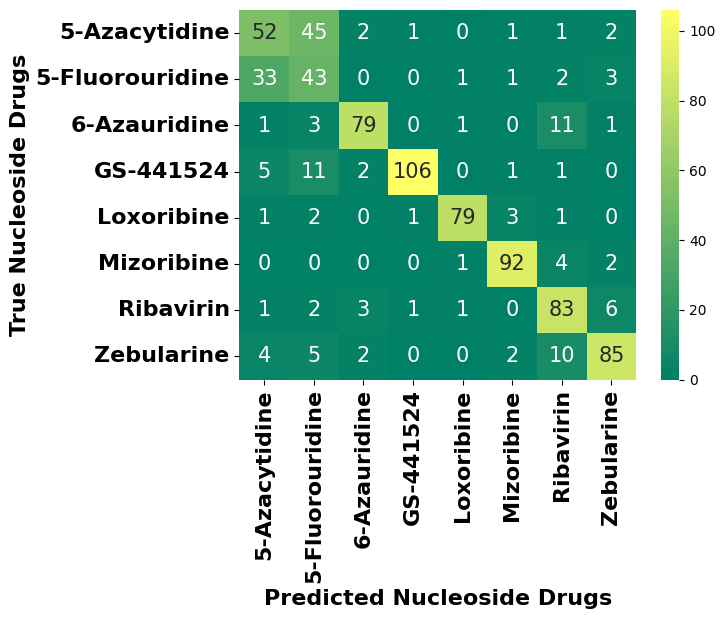

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
cm_RFC = confusion_matrix(y_test, RFC_pred)
cm_RFC_df = pd.DataFrame(cm_RFC,
                     index = ['5-Azacytidine','5-Fluorouridine','6-Azauridine', 'GS-441524', 'Loxoribine', 'Mizoribine', 'Ribavirin', 'Zebularine'],
                     columns = ['5-Azacytidine','5-Fluorouridine','6-Azauridine', 'GS-441524', 'Loxoribine', 'Mizoribine', 'Ribavirin', 'Zebularine'])

sns.heatmap(cm_RFC_df, cbar=True,annot=True,cmap="summer",fmt="d",annot_kws={"size": 15})
plt.ylabel('True Nucleoside Drugs', fontsize = 16,weight='bold')
plt.xlabel('Predicted Nucleoside Drugs', fontsize = 16,weight='bold')
#plt.title('Confusion Matrix', fontsize = 20,weight='bold')
plt.xticks(weight='bold', fontsize = 16)
plt.yticks(weight='bold', fontsize = 16)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, RFC_pred))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52       104
           1       0.39      0.52      0.44        83
           2       0.90      0.82      0.86        96
           3       0.97      0.84      0.90       126
           4       0.95      0.91      0.93        87
           5       0.92      0.93      0.92        99
           6       0.73      0.86      0.79        97
           7       0.86      0.79      0.82       108

    accuracy                           0.77       800
   macro avg       0.78      0.77      0.77       800
weighted avg       0.79      0.77      0.78       800



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Assuming you have X and y as your feature and target data

# Define the random forest classifier
#clf = RandomForestClassifier()

# Define the train-test split ratios
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(RFC, x, y, train_sizes=train_sizes, cv=10, scoring='accuracy')

# Calculate the mean and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

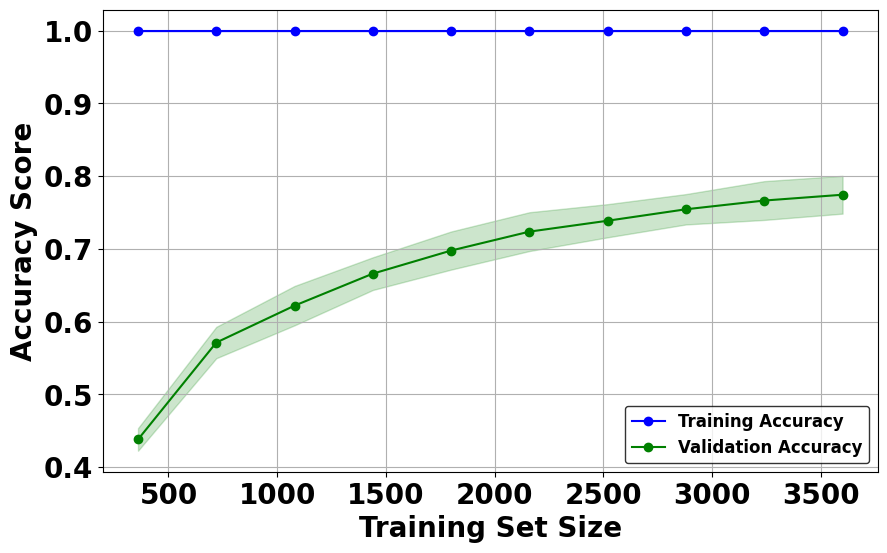

In [ ]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, test_mean, marker='o', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

plt.xticks(weight='bold', fontsize = 20)
plt.yticks(weight='bold', fontsize = 20)
plt.xlabel('Training Set Size', weight='bold', fontsize = 20)
plt.ylabel('Accuracy Score',weight='bold', fontsize = 20)
#plt.title('Learning Curve for Random Forest Classification')
legend= plt.legend(facecolor="white",fontsize=12, loc='upper left',edgecolor='black')
legend=plt.legend(fontsize=12, loc='lower right',edgecolor='black')
for text in legend.get_texts():
    text.set_fontweight('bold')
#plt.legend(loc='best')
plt.grid(True)
plt.show()

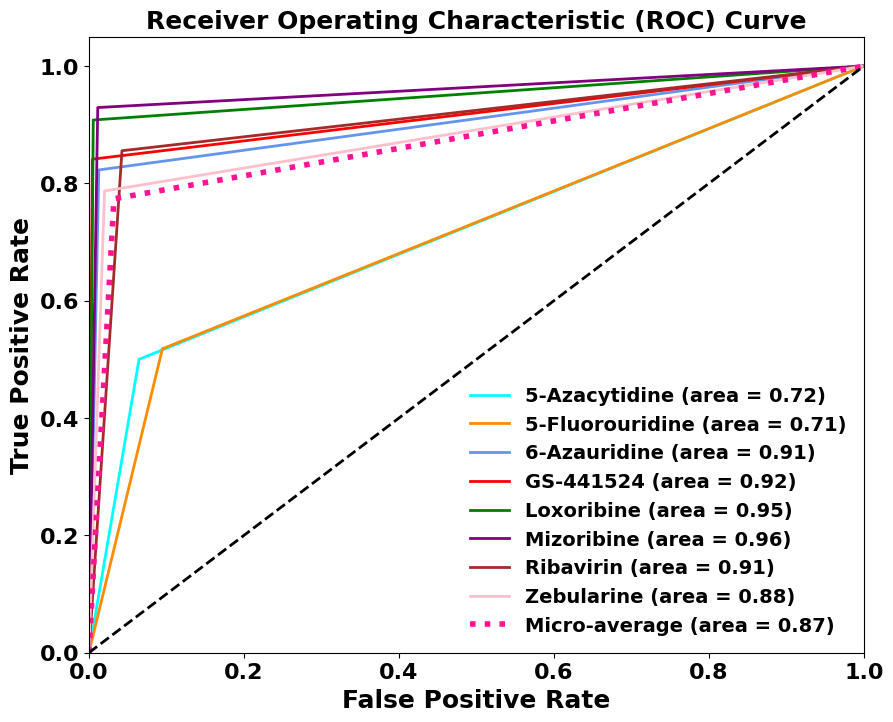

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming RFC_pred contains the predicted labels for the test set
# and y_test contains the true labels for the test set

# Binarize the output
y_test_bin = label_binarize(y_test, classes=list(range(8)))
RFC_pred_bin = label_binarize(RFC_pred, classes=list(range(8)))

# Class names
class_names = ['5-Azacytidine','5-Fluorouridine','6-Azauridine', 'GS-441524', 'Loxoribine', 'Mizoribine', 'Ribavirin', 'Zebularine']

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], RFC_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), RFC_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.rc('legend', fontsize=14)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink'])
for i, color in zip(range(8), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{} (area = {:.2f})'.format(class_names[i], roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average (area = {:.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(weight='bold', fontsize=16)
plt.yticks(weight='bold', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=18, weight='bold')
plt.ylabel('True Positive Rate', fontsize=18, weight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, weight='bold')
plt.legend(loc="lower right", fontsize=14,frameon=False,prop=({'weight':'bold'}))
plt.show()


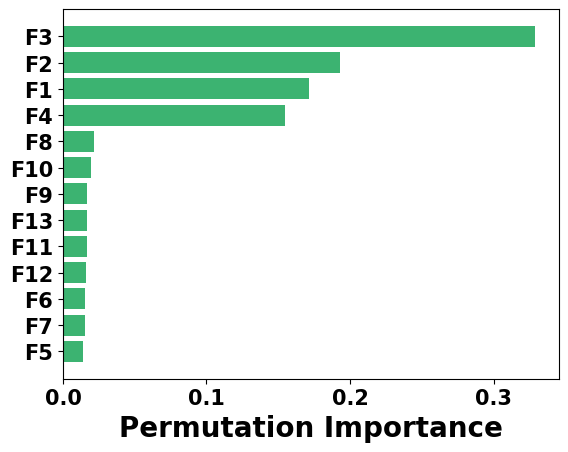

In [ ]:
importances = RFC.feature_importances_
indices = np.argsort(importances)
features = x_train.columns
#plt.title('RFC Feature Importances', fontsize=20, fontweight='bold')
plt.barh(range(len(indices)), importances[indices], color='mediumseagreen', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Permutation Importance', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.xticks([0.0, 0.1, 0.2, 0.3],fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


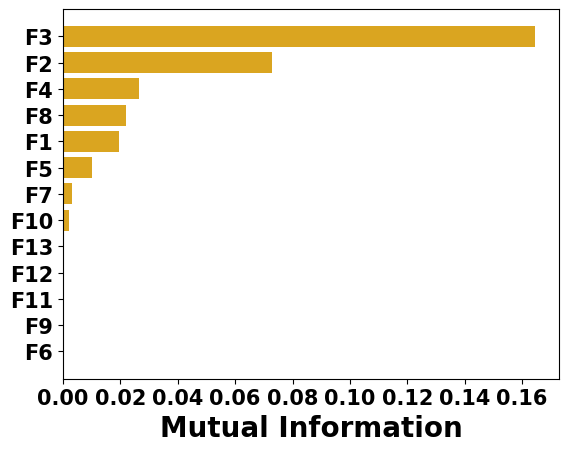

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import matplotlib.pyplot as plt

# Compute mutual information
mutual_importance = mutual_info_classif(x_train, y_train)

# Sort features based on their mutual importance
indices = np.argsort(mutual_importance)
features = x_train.columns
# Plotting
plt.barh(range(len(indices)), mutual_importance[indices], color='goldenrod', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Mutual Information', fontsize=20, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.show()

In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
RFC_explainer = shap.Explainer(RFC, x_train )
RFC_shap_values = RFC_explainer.shap_values(x_train,check_additivity=False)
RFC_shap_values

100%|===================| 25576/25600 [06:28<00:00]       

[array([[-0.02197727,  0.04754515,  0.03718559, ..., -0.00764644,
         -0.00934501, -0.00928628],
        [ 0.00335381,  0.04072151,  0.01075913, ..., -0.00280806,
          0.00124591, -0.00316155],
        [-0.01402655, -0.03260012, -0.04246016, ...,  0.00032258,
         -0.00197849,  0.00229258],
        ...,
        [-0.01217964, -0.02736905, -0.04803294, ...,  0.00147341,
         -0.0030973 ,  0.00194671],
        [-0.01389694, -0.0624694 , -0.07483452, ..., -0.00022659,
         -0.00112507,  0.00189477],
        [ 0.01848603,  0.0677648 ,  0.06720464, ..., -0.0055296 ,
         -0.01846464,  0.00103663]]),
 array([[-7.96524287e-02,  4.72757473e-02,  6.03378901e-02, ...,
         -8.22356062e-03, -1.78928224e-03, -1.22327023e-02],
        [-6.37514329e-02,  3.74236874e-02,  2.26690153e-03, ...,
         -1.05769849e-03, -7.32027429e-04,  1.42853517e-04],
        [-3.11335142e-03, -3.83624791e-02, -1.02083471e-01, ...,
         -3.31836243e-04,  2.35990622e-03, -1.01744230e-

Text(0.5, 43.42222222222221, 'mean(|SHAP Value|')

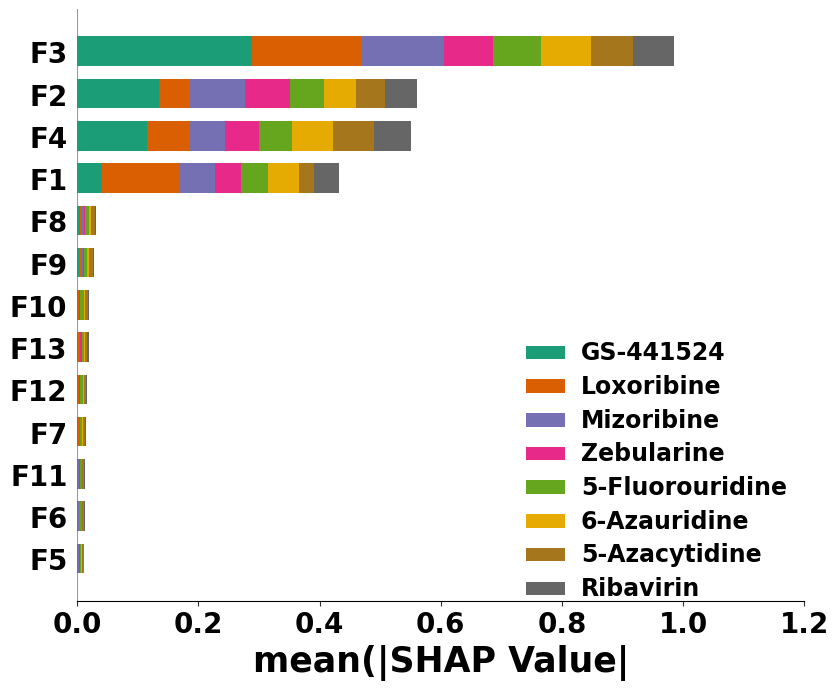

In [ ]:
shap.summary_plot(RFC_shap_values, x_train, plot_type="bar", feature_names=['F1','F2','F3', 'F4','F5','F6','F7', 'F8','F9','F10','F11', 'F12','F13'],
                  class_names=['5-Azacytidine','5-Fluorouridine','6-Azauridine', 'GS-441524', 'Loxoribine', 'Mizoribine', 'Ribavirin', 'Zebularine'], color=plt.get_cmap("Dark2"),show = False )
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2],fontsize=20, fontweight='bold', color='black')
#plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2],fontsize=20, fontweight='bold')
#plt.xticks(fontsize=20, fontweight='bold', color='black')
plt.yticks(fontsize=20, fontweight='bold', color='black')
custom_legend = plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.47), frameon=False)
#plt.gca().get_legend().remove()
for text in custom_legend.get_texts():
    text.set_fontweight('bold')
    text.set_fontsize(17)
plt.xlabel("mean(|SHAP Value|",fontsize=25, fontweight='bold')

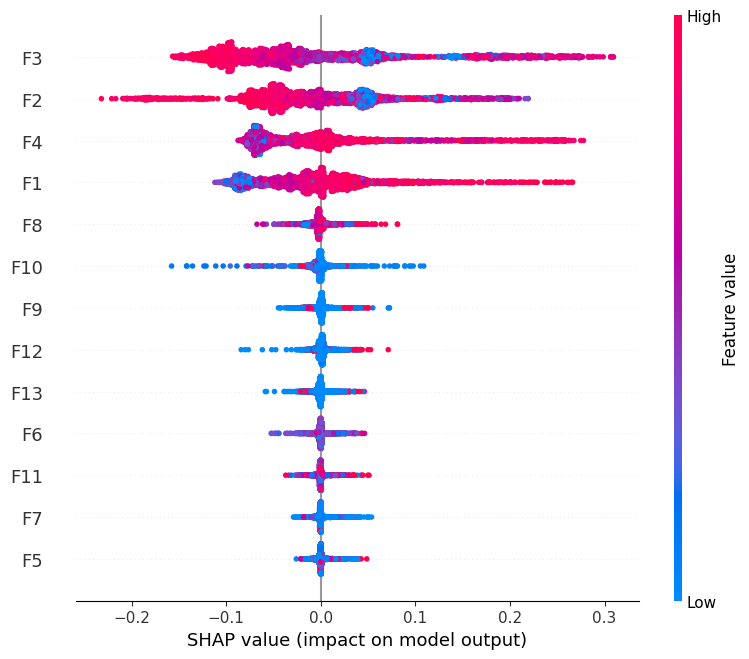

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.summary_plot(RFC_shap_values[1], x_train.values,feature_names=['F1','F2','F3', 'F4','F5','F6','F7', 'F8','F9','F10','F11', 'F12','F13'])
fig = plt.gcf()



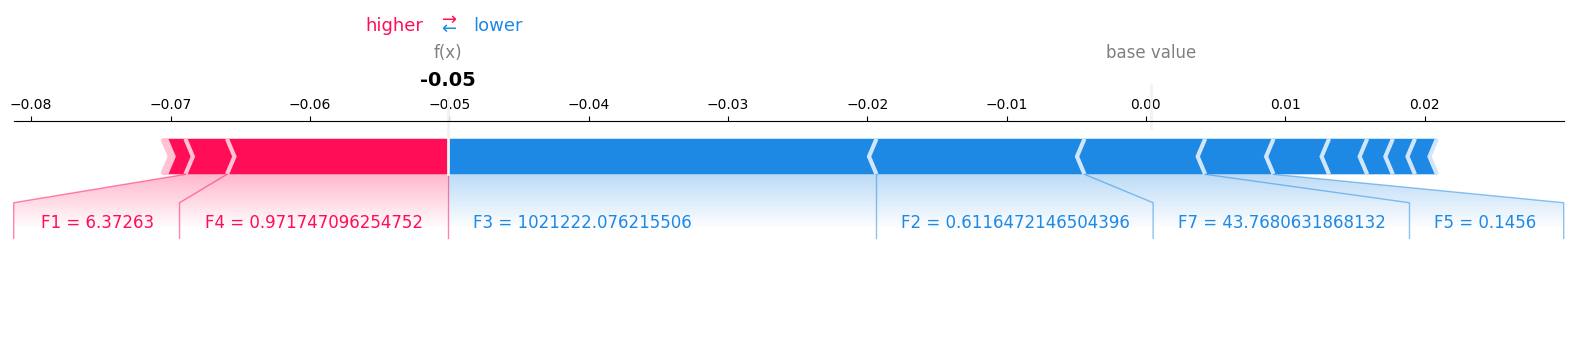

In [ ]:
instance_number = 40  # Change this to the index of the instance you want to explain

shap.initjs()  # Initialize the JavaScript for SHAP plots in Jupyter Notebook

# Get the SHAP values for the selected instance
shap_values = RFC_shap_values[2][instance_number, :]

# Calculate the expected value (mean prediction) of your model
expected_value = RFC_shap_values[2].mean()

# Pass the expected value and SHAP values to the SHAP force plot
force_plot = shap.force_plot(expected_value, shap_values, x_train.iloc[instance_number, :], matplotlib=True)
plt.show()
